## Example 1 - Triangulation of arbitrary points

`stripy` provides a python interfact to TRIPACK and SRFPACK (Renka 1997c,d) as a triangulation class that would typically be used as follows:

``` python

import stripy
triangulation = stripy.Triangulation(x=vertices_x, y=vertices_y)
areas = triangulation.areas()
```

The methods of the `Triangulation` class include interpolation, smoothing and gradients (from SRFPACK), triangle areas, point location by simplex and nearest vertex, refinement operations by edge or centroid, and neighbourhood search / distance computations through a k-d tree algorithm suited to points on the surface of a unit sphere. `stripy` also includes template triangulated meshes with refinement operations.

In this notebook we introduce the `Triangulation` class itself.

#### Notebook contents

   - [Square mesh](#Triangulate-the-vertices-of-a-square-mesh)
   - [Plotting on a map](#Making-a-plot-of-the-triangulation)
   - [2D visualisation](#Lavavu-to-view-spherical-information)
   - [Predefined meshes](#Predefined-meshes)

#### References



 
   1. Renka, R. J. (1997), Algorithm 772: STRIPACK: Delaunay triangulation and Voronoi diagram on the surface of a sphere, ACM Transactions on Mathematical Software (TOMS).
   
   2. Renka, R. J. (1997), Algorithm 773: SSRFPACK: interpolation of scattered data on the surface of a sphere with a surface under tension, ACM Transactions on Mathematical Software (TOMS), 23(3), 435–442, doi:10.1145/275323.275330.
   
   3. Renka, R. J. (1996), Algorithm 751; TRIPACK: a constrained two-dimensional Delaunay triangulation package, ACM Transactions on Mathematical Software, 22(1), 1–8, doi:10.1145/225545.225546.
   
   4. Renka, R. J. (1996), Algorithm 752; SRFPACK: software for scattered data fitting with a constrained surface under tension, ACM Transactions on Mathematical Software, 22(1), 9–17, doi:10.1145/225545.225547.


The next example is [Ex2-SphericalGrids](./Ex2-SphericalGrids.ipynb)

## Triangulate the vertices of a square mesh

In [1]:
import stripy as stripy
import numpy as np

# Vertices of a square mesh

vertices_xy = np.array([[0.0,   0.0],
                        [1.0,   0.0],
                        [0.0,   1.0],
                        [1.0,   1.0]])


vertices_x = vertices_xy.T[0]
vertices_y = vertices_xy.T[1]


triangulation = stripy.Triangulation(x=vertices_x, y=vertices_y, permute=False)

In [2]:
print(triangulation.areas())
print(triangulation.npoints)

[0.5 0.5]
4


This creates a triangulation object constructed using the wrapped fortran code of Renka (1997). The triangulation object has a number of 
useful methods and attached data which can be listed with

``` python

help(triangulation)
```


In [3]:
refined_triangulation = stripy.Triangulation(x=vertices_x, y=vertices_y, refinement_levels=4, permute=False)

print(refined_triangulation.npoints)

289


## Making a plot of the triangulation

We can make a plot of the two grids and the most straightforward way to display the information
is through a standard map projection of the sphere to the plane. 

(Here we superimpose the points on a global map of coastlines using the `cartopy` map library and use the Mollweide projection. 
 Other projections to try include `Robinson`, `Orthographic`, `PlateCarree`)

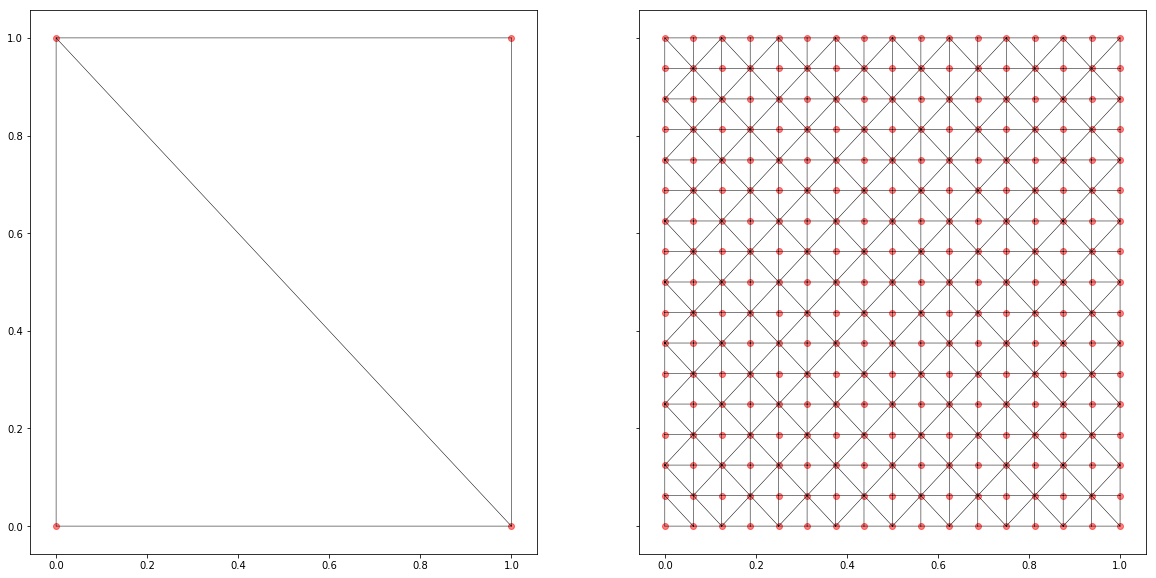

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt


fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20, 10), facecolor="none", sharey=True)


## Plot the vertices and the edges for the original mesh
x = triangulation.x
y = triangulation.y
simplices = triangulation.simplices

ax1.triplot(x, y, simplices, linewidth=0.5, color='black')
ax1.scatter(x, y, color='Red', alpha=0.5, marker='o')


## Plot the vertices and the edges for the refined mesh
x = refined_triangulation.x
y = refined_triangulation.y
simplices = refined_triangulation.simplices

ax2.triplot(x, y, simplices, linewidth=0.5, color='black')
ax2.scatter(x, y, color='Red', alpha=0.5, marker='o')

plt.show()

## Predefined meshes

One common use of `stripy` is in meshing x,y coordinates and, to this end, we provide pre-defined meshes for square and elliptical triangulations. A random mesh is included as a counterpoint to the regular meshes. The square mesh defined above can be created directly using:

``` python

triangulation         = stripy.cartesian_meshes.square_mesh(extent, spacingX, spacingY, refinement_levels=0)
refined_triangulation = stripy.cartesian_meshes.square_mesh(extent, spacingX, spacingY, refinement_levels=3)
```

This capability is shown in a companion notebook [Ex2-CartesianGrids](./Ex2-CartesianGrids.ipynb)
